In [2]:
import pandas as pd

# Agbarometer202509

In [ ]:
df = pd.read_excel('../data/raw_data/Agbarometer202509.xlsx')
print(df.head())

    Bimestre  CondicIones presentes  Expectativas futuras  Ag Barometer
0 2018-10-01                     53                   132           100
1 2018-11-01                     43                   130            95
2 2019-01-01                     59                   137           106
3 2019-03-01                     69                   126           103
4 2019-05-01                     82                   141           117


El primer dato hay que eliminarlo porque no corresponde a la secuencia de bimetre (sabido de antemano)

In [ ]:
df.drop(0, inplace=True)

In [ ]:
df.to_csv('../data/clean_data/agbarometer_cleaned.csv', index=False)

# AgEconomyBarometer202510

In [18]:
df = pd.read_excel('../data/raw_data/AgEconomyBarometer202510.xlsx')
print(df.head())

  Month/Year  Unnamed: 1  Purdue/CME Ag Economy Barometer  \
0    October        2015                              116   
1   November        2015                               97   
2   December        2015                              107   
3    January        2016                               98   
4   February        2016                               96   

   Index of Current Conditions  Index of Future Expectations  \
0                          118                           116   
1                           98                            97   
2                          125                            98   
3                           99                            98   
4                           82                           102   

   Farm Capital Investment Index  
0                             67  
1                             51  
2                             75  
3                             52  
4                             56  


In [20]:
df.rename(columns={'Month/Year': 'Month','Unnamed: 1': 'Year'}, inplace=True)

In [ ]:
df.to_csv('../data/clean_data/AgEconomyBarometer_cleaned.csv', index=False)

# ICG UTDT

In [2]:
df1 = pd.read_excel('../data/raw_data/ICG UTDT.xls', sheet_name='Evolución ICG 2001-2022')
print(df1.head())

df2 = pd.read_excel('../data/raw_data/ICG UTDT.xls', sheet_name='Evolución ICG a partir de 2023')
print(df2.head())

      Unnamed: 0  2001-11-01 00:00:00  2001-12-01 00:00:00  \
0           ICG                 1.036             0.757000   
1  Variación ICG                  NaN            -0.269305   

   2002-01-01 00:00:00  2002-02-01 00:00:00  2002-03-01 00:00:00  \
0             1.357000             0.983000             0.862000   
1             0.792602            -0.275608            -0.123093   

   2002-04-01 00:00:00  2002-05-01 00:00:00  2002-06-01 00:00:00  \
0             0.782000             0.467000              0.48200   
1            -0.092807            -0.402813              0.03212   

   2002-07-01 00:00:00  ...  2022-03-01 00:00:00  2022-04-01 00:00:00  \
0             0.404000  ...             1.507731             1.436073   
1            -0.161826  ...             0.009000            -0.048000   

   2022-05-01 00:00:00  2022-06-01 00:00:00  2022-07-01 00:00:00  \
0             1.303236             1.401616             1.116667   
1            -0.093000             0.075000    

In [8]:
df2

,Unnamed: 0,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00,...,2025-01-01 00:00:00,2025-02-01 00:00:00,2025-03-01 00:00:00,2025-04-01 00:00:00,2025-05-01 00:00:00,2025-06-01 00:00:00,2025-07-01 00:00:00,2025-08-01 00:00:00,2025-09-01 00:00:00,2025-10-01 00:00:00
0,ICG,1.274121,1.17133,1.177622,1.070521,1.132271,1.119684,1.199,1.266,1.032259,...,2.605000,2.558000,2.420000,2.331000,2.448000,2.336000,2.451000,2.118000,1.943966,2.101128
1,Variación ICG,0.018000,-0.08100,0.005000,-0.091000,0.058000,-0.011000,0.071,0.056,-0.185000,...,-0.018832,-0.018042,-0.053948,-0.036777,0.050193,-0.045752,0.049229,-0.135863,-0.082169,0.081000


In [4]:
# convertir df1 a formato long
df1_long = df1.melt(id_vars='Unnamed: 0', var_name='date', value_name='value')
df1_long.rename(columns={'Unnamed: 0': 'indicator'}, inplace=True)

df1_long['date'] = pd.to_datetime(df1_long['date'], errors='coerce')
df1_long = df1_long.sort_values(['indicator', 'date']).reset_index(drop=True)

# convertir df2 a formato long
df2_long = df2.melt(id_vars='Unnamed: 0', var_name='date', value_name='value')
df2_long.rename(columns={'Unnamed: 0': 'indicator'}, inplace=True)

df2_long['date'] = pd.to_datetime(df2_long['date'], errors='coerce')
df2_long = df2_long.sort_values(['indicator', 'date']).reset_index(drop=True)


In [10]:
df1_long

,indicator,date,value
0,ICG,2001-11-01,1.036
1,ICG,2001-12-01,0.757
2,ICG,2002-01-01,1.357
3,ICG,2002-02-01,0.983
4,ICG,2002-03-01,0.862
...,...,...,...
503,Variación ICG,2022-08-01,0.059
504,Variación ICG,2022-09-01,0.041
505,Variación ICG,2022-10-01,0.042
506,Variación ICG,2022-11-01,-0.072


In [34]:
df_final = pd.concat([df1_long, df2_long], ignore_index=True)

In [35]:
df_final = df_final[df_final['indicator'] == 'ICG ']

In [36]:
df_final.replace({'indicator': {'ICG ': 'ICG'}}, inplace=True)

In [37]:
df_final.reset_index(drop=True, inplace=True)

In [40]:
df_final.to_csv('../data/clean_data/ICG_cleaned.csv', index=False)

# Dolar MEP

In [48]:
df = pd.read_csv('../data/raw_data/dolar_mep.csv')
print(df.head())

     especie  ultimo  variacion  anterior  apertura  minimo  maximo  varMTD  \
0  DOLAR MEP   36.97        NaN       NaN     36.97   36.97   36.97     NaN   
1  DOLAR MEP   36.63        0.0     36.63     36.63   36.63   36.63     NaN   
2  DOLAR MEP   35.93        0.0     35.93     35.93   35.93   35.93     NaN   
3  DOLAR MEP   35.89        0.0     35.89     35.89   35.89   35.89     NaN   
4  DOLAR MEP   35.66        0.0     35.66     35.66   35.66   35.66     NaN   

   varYTD  var6M  var12M       fecha   hora  cierre   timestamp  volumen  
0     NaN    NaN     NaN  2018-10-29    NaN   36.97  1540782000        0  
1     NaN    NaN     NaN  2018-10-30  19:59   36.63  1540868400        0  
2     NaN    NaN     NaN  2018-10-31  19:59   35.93  1540954800        0  
3     NaN    NaN     NaN  2018-11-01  19:59   35.89  1541041200        0  
4     NaN    NaN     NaN  2018-11-02  19:59   35.66  1541127600        0  


In [49]:
if 'especie' in df.columns:
    df.drop(columns='especie', inplace=True)

if 'timestamp' in df.columns:
    df.drop(columns='timestamp', inplace=True)

if 'hora' in df.columns:
    df.drop(columns='hora', inplace=True)

df.head()

,ultimo,variacion,anterior,apertura,minimo,maximo,varMTD,varYTD,var6M,var12M,fecha,cierre,volumen
0,36.97,NaN,NaN,36.97,36.97,36.97,NaN,NaN,NaN,NaN,2018-10-29,36.97,0
1,36.63,0.0,36.63,36.63,36.63,36.63,NaN,NaN,NaN,NaN,2018-10-30,36.63,0
2,35.93,0.0,35.93,35.93,35.93,35.93,NaN,NaN,NaN,NaN,2018-10-31,35.93,0
3,35.89,0.0,35.89,35.89,35.89,35.89,NaN,NaN,NaN,NaN,2018-11-01,35.89,0
4,35.66,0.0,35.66,35.66,35.66,35.66,NaN,NaN,NaN,NaN,2018-11-02,35.66,0


In [50]:
print(df['varMTD'].value_counts())
print(df['varYTD'].value_counts())
print(df['var6M'].value_counts())
print(df['var12M'].value_counts())
print(df['volumen'].value_counts())

Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
volumen
0    1992
Name: count, dtype: int64


In [51]:
if 'varMTD' in df.columns:
    df.drop(columns='varMTD', inplace=True)

if 'varYTD' in df.columns:
    df.drop(columns='varYTD', inplace=True)

if 'var6M' in df.columns:
    df.drop(columns='var6M', inplace=True)

if 'var12M' in df.columns:
    df.drop(columns='var12M', inplace=True)

if 'volumen' in df.columns:
    df.drop(columns='volumen', inplace=True)

df.head()

,ultimo,variacion,anterior,apertura,minimo,maximo,fecha,cierre
0,36.97,NaN,NaN,36.97,36.97,36.97,2018-10-29,36.97
1,36.63,0.0,36.63,36.63,36.63,36.63,2018-10-30,36.63
2,35.93,0.0,35.93,35.93,35.93,35.93,2018-10-31,35.93
3,35.89,0.0,35.89,35.89,35.89,35.89,2018-11-01,35.89
4,35.66,0.0,35.66,35.66,35.66,35.66,2018-11-02,35.66


In [52]:
#copio para trabajar mensualizado luego
df_mep = df.copy()

In [18]:
df.to_csv('../data/clean_data/dolar_mep_cleaned.csv', index=False)

# Dolar Oficial

In [53]:
df = pd.read_excel('../data/raw_data/dolar_oficial.xlsx')
print(df.head())

       Fecha  Valor
0 2018-01-02  18.55
1 2018-01-03  18.42
2 2018-01-04  18.61
3 2018-01-05  18.86
4 2018-01-08  19.07


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1917 entries, 0 to 1916
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   1917 non-null   datetime64[ns]
 1   Valor   1917 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 30.1 KB


In [55]:
#copio para trabajar mensualizado luego
df_oficial = df.copy()

In [31]:
df.to_csv('../data/clean_data/dolar_oficial_cleaned.csv', index=False)

# REM

In [32]:
df = pd.read_excel('../data/raw_data/rem.xlsx')
print(df.head())

       Fecha  Valor
0 2018-01-31   18.6
1 2018-02-28   17.6
2 2018-03-31   17.8
3 2018-04-30   18.2
4 2018-05-31   22.2


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   94 non-null     datetime64[ns]
 1   Valor   94 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.6 KB


In [34]:
df.to_csv('../data/clean_data/rem_cleaned.csv', index=False)

# Soja Chicago

In [35]:
df = pd.read_csv('../data/raw_data/precio_soja_chicago.csv')
print(df.head())

        Price   Close   High     Low    Open Volume
0      Ticker    ZS=F   ZS=F    ZS=F    ZS=F   ZS=F
1        Date     NaN    NaN     NaN     NaN    NaN
2  2018-01-02   955.0  960.0   949.5   956.5   2900
3  2018-01-03  959.75  960.5   955.0  956.25   2582
4  2018-01-04  959.25  960.0  950.25  959.25   2133


In [38]:
df = df.drop([0, 1], axis=0).reset_index(drop=True)

In [40]:
print(df.head())

        Price   Close    High     Low    Open Volume
0  2018-01-02   955.0   960.0   949.5   956.5   2900
1  2018-01-03  959.75   960.5   955.0  956.25   2582
2  2018-01-04  959.25   960.0  950.25  959.25   2133
3  2018-01-05   961.5   966.5   960.0   960.0   1278
4  2018-01-08  958.25  962.25   951.5  960.75    988


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   1986 non-null   object
 1   Close   1986 non-null   object
 2   High    1986 non-null   object
 3   Low     1986 non-null   object
 4   Open    1986 non-null   object
 5   Volume  1986 non-null   object
dtypes: object(6)
memory usage: 93.2+ KB


In [42]:
df.rename(columns={'Price': 'date'}, inplace=True)

In [45]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df['High'] = pd.to_numeric(df['High'], errors='coerce')
df['Low'] = pd.to_numeric(df['Low'], errors='coerce')
df['Open'] = pd.to_numeric(df['Open'], errors='coerce')
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1986 non-null   datetime64[ns]
 1   Close   1986 non-null   float64       
 2   High    1986 non-null   float64       
 3   Low     1986 non-null   float64       
 4   Open    1986 non-null   float64       
 5   Volume  1986 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 93.2 KB


In [47]:
df.to_csv('../data/clean_data/precio_soja_chicago_cleaned.csv', index=False)

# Unificación de USD

In [59]:
df_oficial

,Fecha,Valor
0,2018-01-02,18.55
1,2018-01-03,18.42
2,2018-01-04,18.61
3,2018-01-05,18.86
4,2018-01-08,19.07
...,...,...
1912,2025-11-14,1405.00
1913,2025-11-17,1401.00
1914,2025-11-18,1388.00
1915,2025-11-19,1402.50


In [ ]:
df_mep_short = df_mep[['fecha', 'cierre']]

In [60]:
df_mep_short['fecha'] = pd.to_datetime(df_mep_short['fecha'])
df_mep_monthly = df_mep_short.set_index('fecha').resample('MS').mean().reset_index()
df_mep_monthly.columns = ['fecha', 'cierre']
df_mep_monthly

C:\Users\josek\AppData\Local\Temp\ipykernel_29316\187490266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mep_short['fecha'] = pd.to_datetime(df_mep_short['fecha'])


,fecha,cierre
0,2018-10-01,36.510000
1,2018-11-01,36.514000
2,2018-12-01,38.033226
3,2019-01-01,37.515484
4,2019-02-01,38.506786
...,...,...
81,2025-07-01,1277.184138
82,2025-08-01,1334.568621
83,2025-09-01,1441.650333
84,2025-10-01,1500.312258


In [64]:
df_oficial['Fecha'] = pd.to_datetime(df_oficial['Fecha'])
df_oficial_monthly = df_oficial.set_index('Fecha').resample('MS').mean().reset_index()
df_oficial_monthly.columns = ['Fecha', 'Valor']
df_oficial_monthly.rename(columns={'Fecha': 'fecha', 'Valor': 'valor'}, inplace=True)
df_oficial_monthly

,fecha,valor
0,2018-01-01,19.029545
1,2018-02-01,19.841667
2,2018-03-01,20.237000
3,2018-04-01,20.235263
4,2018-05-01,23.670000
...,...,...
90,2025-07-01,1267.023182
91,2025-08-01,1329.537000
92,2025-09-01,1399.898636
93,2025-10-01,1432.022727


In [67]:
df_usd = df_mep_monthly.merge(df_oficial_monthly, on='fecha', how='outer').sort_values('fecha').reset_index(drop=True)
df_usd.rename(columns={'cierre': 'mep', 'valor': 'oficial'}, inplace=True)
df_usd['brecha'] = df_usd['mep'] - df_usd['oficial']
df_usd

,fecha,mep,oficial,brecha
0,2018-01-01,NaN,19.029545,NaN
1,2018-02-01,NaN,19.841667,NaN
2,2018-03-01,NaN,20.237000,NaN
3,2018-04-01,NaN,20.235263,NaN
4,2018-05-01,NaN,23.670000,NaN
...,...,...,...,...
90,2025-07-01,1277.184138,1267.023182,10.160956
91,2025-08-01,1334.568621,1329.537000,5.031621
92,2025-09-01,1441.650333,1399.898636,41.751697
93,2025-10-01,1500.312258,1432.022727,68.289531


<Axes: title={'center': 'Brecha USD (MEP - Oficial)'}, xlabel='fecha'>

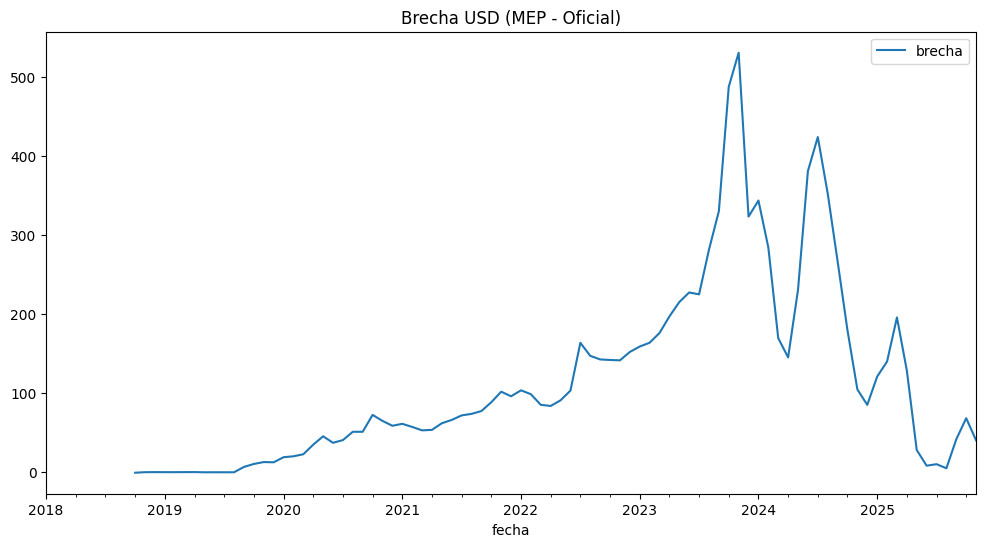

In [68]:
df_usd.plot(x='fecha', y='brecha', figsize=(12, 6), title='Brecha USD (MEP - Oficial)')

In [69]:
df_usd.to_csv('../data/clean_data/dolar_full_cleaned.csv', index=False)

# Dolar oficial desde 2002

In [3]:
df = pd.read_excel('../data/raw_data/dolar_oficial_completo.xlsx')
print(df.head())

       Fecha  Valor
0 2002-03-12   2.37
1 2002-03-13   2.33
2 2002-03-14   2.37
3 2002-03-15   2.34
4 2002-03-18   2.32


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5826 entries, 0 to 5825
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   5826 non-null   datetime64[ns]
 1   Valor   5826 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 91.2 KB


In [5]:
df.to_csv('../data/clean_data/dolar_oficial_completo_cleaned.csv', index=False)

# Indice CER

In [6]:
df = pd.read_excel('../data/raw_data/cer.xlsx')
print(df.head())

       Fecha   Valor
0 2002-02-14  1.0064
1 2002-02-15  1.0072
2 2002-02-16  1.0080
3 2002-02-17  1.0088
4 2002-02-18  1.0097


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8722 entries, 0 to 8721
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   8722 non-null   datetime64[ns]
 1   Valor   8722 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 136.4 KB


In [8]:
df.to_csv('../data/clean_data/cer_cleaned.csv', index=False)

# Soja chicago completo

In [9]:
df = pd.read_csv('../data/raw_data/precio_soja_chicago_completo.csv')
print(df.head())

        Price   Close    High     Low    Open Volume
0      Ticker    ZS=F    ZS=F    ZS=F    ZS=F   ZS=F
1        Date     NaN     NaN     NaN     NaN    NaN
2  2002-04-01  474.25  475.75   474.0   475.0    159
3  2002-04-02   476.0  476.75  475.75  475.75    297
4  2002-04-03   472.0  472.75  471.25   472.5    424


In [10]:
df = df.drop([0, 1], axis=0).reset_index(drop=True)

In [11]:
print(df.head())

        Price   Close    High     Low    Open Volume
0  2002-04-01  474.25  475.75   474.0   475.0    159
1  2002-04-02   476.0  476.75  475.75  475.75    297
2  2002-04-03   472.0  472.75  471.25   472.5    424
3  2002-04-04   462.0   463.0   461.5   461.5    399
4  2002-04-05   460.5   461.5   459.5   459.5    119


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5969 entries, 0 to 5968
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   5969 non-null   object
 1   Close   5969 non-null   object
 2   High    5969 non-null   object
 3   Low     5969 non-null   object
 4   Open    5969 non-null   object
 5   Volume  5969 non-null   object
dtypes: object(6)
memory usage: 279.9+ KB


In [13]:
df.rename(columns={'Price': 'date'}, inplace=True)

In [14]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df['High'] = pd.to_numeric(df['High'], errors='coerce')
df['Low'] = pd.to_numeric(df['Low'], errors='coerce')
df['Open'] = pd.to_numeric(df['Open'], errors='coerce')
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5969 entries, 0 to 5968
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    5969 non-null   datetime64[ns]
 1   Close   5969 non-null   float64       
 2   High    5969 non-null   float64       
 3   Low     5969 non-null   float64       
 4   Open    5969 non-null   float64       
 5   Volume  5969 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 279.9 KB


In [16]:
df.to_csv('../data/clean_data/precio_soja_chicago_completo_cleaned.csv', index=False)